In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

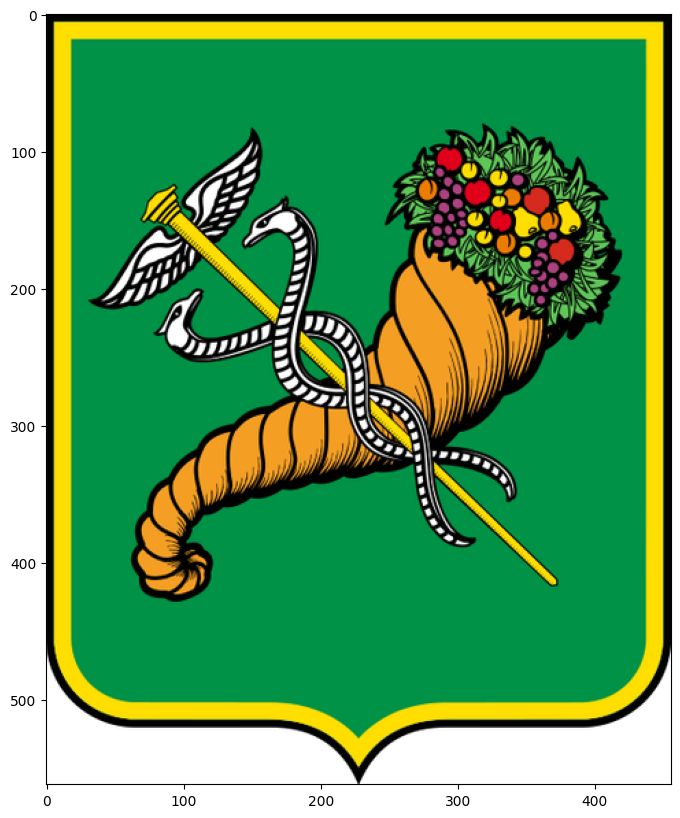

In [125]:
link = 'https://th.bing.com/th/id/R.e9859059c3cc46532f107976c286fb0a?rik=ZvlrnX4HtiCRfQ&pid=ImgRaw&r=0'
emblem = io.imread(link)

plt.figure(figsize=(10, 10))
plt.imshow(emblem)
plt.show()

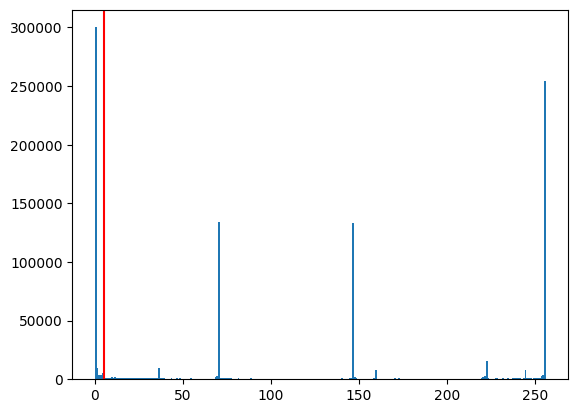

In [47]:
plt.hist(emblem.ravel(), 256, [0, 256])
plt.axvline(5, color='r')
plt.show()

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

Text(0.5, 0, 'Blue')

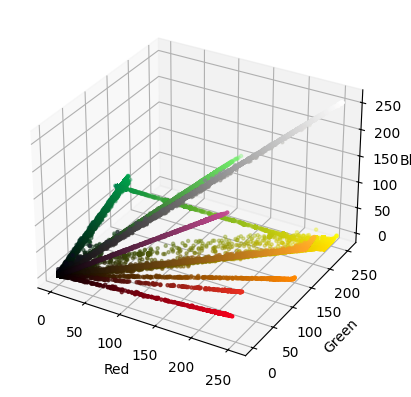

In [42]:
r, g, b = emblem[:, :, 0], emblem[:, :, 1], emblem[:, :, 2]
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

height, width, channels = emblem.shape
pixel_colors = emblem.reshape((height * width, channels))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')

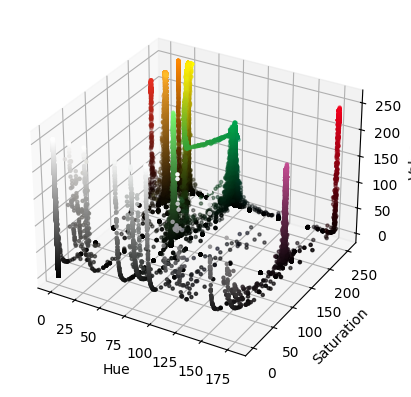

<Figure size 640x480 with 0 Axes>

In [60]:
hsv_emblem = cv2.cvtColor(emblem, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_emblem)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

plt.figure()
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')
plt.show()

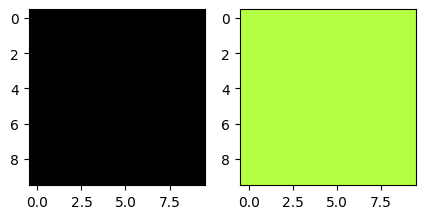

In [114]:
lower_black = np.array([0, 0, 0], dtype="uint8")
upper_black = np.array([180, 255, 68], dtype="uint8")

lb_sqaure = np.full((10, 10, 3), lower_black, dtype=np.uint8) / 255.0
ub_sqaure = np.full((10, 10, 3), upper_black, dtype=np.uint8) / 255.0

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(lb_sqaure)
plt.subplot(1, 2, 2)
plt.imshow(ub_sqaure)
plt.show()

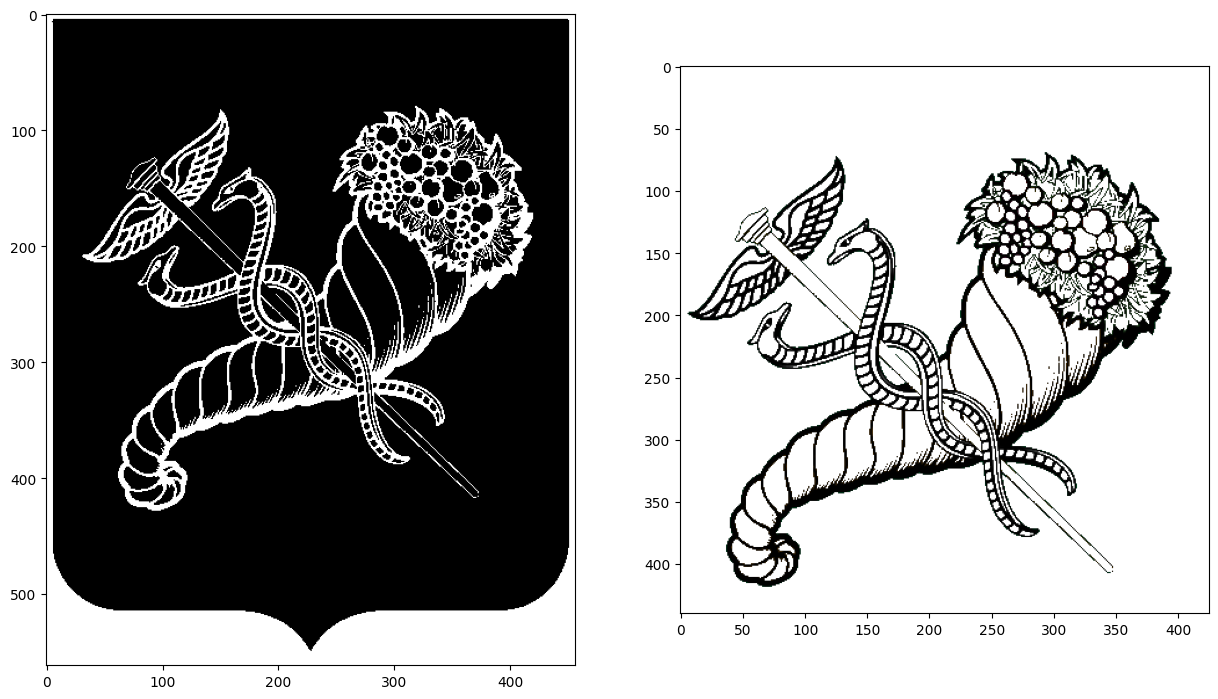

In [123]:
mask = cv2.inRange(hsv_emblem, lower_black, upper_black)
result = cv2.bitwise_and(emblem, emblem, mask=mask)

result = result[10:450, 25:450, :]

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

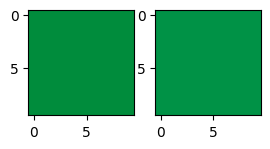

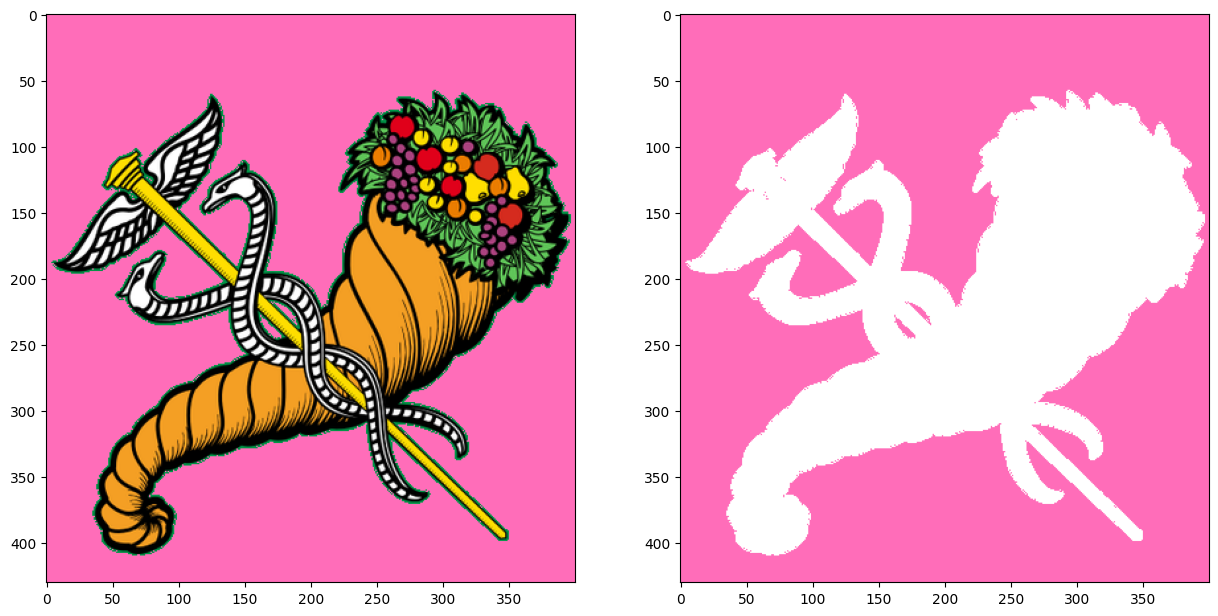

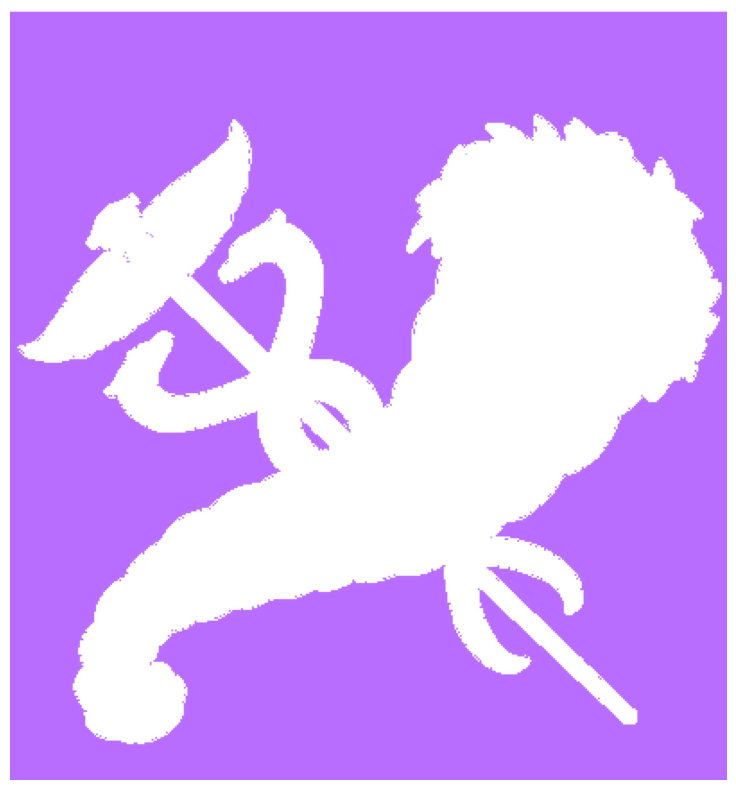

In [171]:
lower_green = np.array([0, 140, 60], dtype="uint8")
upper_green = np.array([0, 146, 70], dtype="uint8")

lg_sqaure = np.full((10, 10, 3), lower_green, dtype=np.uint8) / 255
ug_sqaure = np.full((10, 10, 3), upper_green, dtype=np.uint8) / 255

plt.figure(figsize=(3, 3))
plt.subplot(121)
plt.imshow(lg_sqaure)
plt.subplot(122)
plt.imshow(ug_sqaure)
plt.show()

result = cv2.cvtColor(emblem.copy()[20:450, 25:425], cv2.COLOR_BGRA2BGR)
mask = cv2.inRange(result, lower_green, upper_green)
result = cv2.bitwise_not(result, result, mask=mask)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(result)

mask_inv = np.logical_not(mask)
result[mask_inv] = [255, 255, 255]

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()


bilateral_blurred_result = cv2.bilateralFilter(result, 9, 75, 75)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(bilateral_blurred_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [172]:
cv2.imwrite('output.png', result)
cv2.waitKey(0)
cv2.destroyAllWindows()